# MNIST - KNN

In [1]:
#Importing:

import numpy as np
import pandas as pd

import idx2numpy #For loading data; idx-ubyte to nparray

import matplotlib.pyplot as plt #Visualizing data 
from collections import Counter #Dependancy for my majority vote method

I choose to import via exact directory:

In [2]:
pwd

'/home/marco/Desktop/godBless/samples2'

## Loading in the data

In [3]:
#I manually choose each path like a madlad
fileTrainX = '/home/marco/Desktop/godBless/samples2/train-images-idx3-ubyte'
fileTrainY = '/home/marco/Desktop/godBless/samples2/train-labels-idx1-ubyte'
fileTestX = '/home/marco/Desktop/godBless/samples2/t10k-images-idx3-ubyte'
fileTestY = '/home/marco/Desktop/godBless/samples2/t10k-labels-idx1-ubyte'


In [4]:
#Loading in the data through numpy 
# trainX - 60k 28x28 grayscale images  (60000, 28, 28)
# trainY - 60k digit labels (60000,)
# trainX - 10k grayscale 28x28 images (10000, 28, 28)
# trainY - 10k digit labels (10000,)

trainX = idx2numpy.convert_from_file(fileTrainX)
trainY = idx2numpy.convert_from_file(fileTrainY)
testX = idx2numpy.convert_from_file(fileTestX)
testY = idx2numpy.convert_from_file(fileTestY)

In [5]:
#Verifying basic correctness
print('X_train: ' + str(trainX.shape))
print('Y_train: ' + str(trainY.shape))
print('X_test:  '  + str(testX.shape))
print('Y_test:  '  + str(testY.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [6]:
#Alright, looks like we got it!
trainX

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

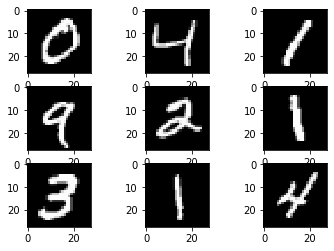

In [7]:
#Alright, let's just see some!
for i in range(1,10):  
    plt.subplot(3,3,i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
    #plt.show()
    

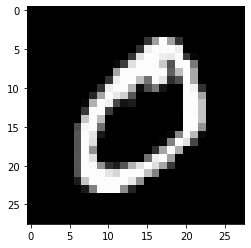

In [8]:
#If we want to inspect a specific image at index k:
secondDigit = trainX[1]
plt.imshow(secondDigit, cmap=plt.get_cmap('gray'))

In [9]:
#It's value will relate with the same index : YEUP it's a zero!
trainY[1]

0

In [10]:
trainLabelDict = Counter(trainY)
trainLabelDict

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

<BarContainer object of 10 artists>

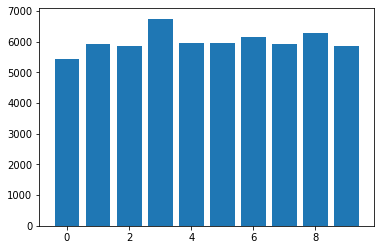

In [11]:
#Just to show that it seems the digits are roughly uniformly distributed
plt.bar(range(len(trainLabelDict)), list(trainLabelDict.values()), align='center')

### Preprocess the test digits to be in the form of int32 (rather than uint8)





In [12]:
testX.shape

(10000, 28, 28)

In [13]:
testXArr = testX.astype(np.int32)
testXArr

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [14]:
testYArr = testY.astype(np.double)
testYArr

array([7., 2., 1., ..., 4., 5., 6.])

In [17]:
testYArr = testY.astype(np.int32)
testYArr

array([7, 2, 1, ..., 4, 5, 6], dtype=int32)

In [114]:
trainXArr = trainX.astype(np.int32)
trainXArr.shape

(60000, 28, 28)

In [117]:
trainYArr = trainY.astype(np.int32)
trainYArr.shape

(60000,)

In [18]:
testYArr[0]

7

In [232]:
testXArr[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 150, 253, 202,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 251, 251, 253, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 197, 251, 251, 253, 107,   0,   0,   0

In [21]:
#This can't be done until method cell below is ran
euclidean_distance(testXArr[3],trainX[1])

1980.683972773042

## K-NN Application

In [ ]:
#Recall
# trainX - 60k 28x28 grayscale images  (60000, 28, 28)
# trainY - 60k digit labels (60000,)
# trainX - 10k grayscale 28x28 images (10000, 28, 28)
# trainY - 10k digit labels (10000,)

In [22]:

def euclidean_distance(p, q):
    """
    INPUT: Matrix images p,q
    OUTPUT: Euclidian distance sum ((p-q)**2)
    Note: Be wary of uint8-uint8 due to overflow at negative.
    """
    # element-wise computations are automatically handled by numpy
    return ( np.sqrt(np.sum((p-q)**2)) )


In [23]:
#Majority K Voting

def findMajority(labels):
    """
    INPUT: list of k labels most similar to that particular image p.
    OUTPUT: The value of the greatest count.
    Dependancy: Requires Counter from collections.
    Note: If there is a tie, it takes the first max value along the dictionary.
    Method Usage: Method for Majority K Voting.
    """
    #Counter to create dictionary and count
    labelDict = Counter(labels)
    
    #Max of the dictionary
    labelMax = max(labelDict.values())
    
    #Iterate through to find key (and majority class)
    for key, value in labelDict.items():
        if value == labelMax:
            return key

In [82]:

def predictOneDigit(k, trainSet, trainLabels, testDigit):
    """
    INPUT: k nearest neighbors, training set, training labels, test set.
    OUTPUT: Returns a classification based on euclidean distance for a test digit.
    Dependencies: Counter (in majority vote)
    """
    
    #For a single testDigit, compute its euclidean distance versus entire train set
    distances = [euclidean_distance(testDigit,trainSet[i]) for i in range(len(trainSet))]
    
    #Tuple distances array with labels
    tupledDistances = np.array(list(zip(trainLabels,distances)))
    
    #Sort the (this is more expensive than needed)
    sortedDistances = sorted(tupledDistances, key=lambda tup: tup[1])
    
    #Extract out k labels
    kLabels = [label for (label,_) in sortedDistances[:k]]
    
    #Return the classified label by maority vote (size k)
    return (findMajority(kLabels))
    

In [83]:
predictOneDigit(10,trainX,trainY,testXArr[1])

2.0

In [84]:
testY[1]

2

In [79]:
predictions1 = [predictOneDigit(10,trainX,trainY,testXArr[i]) for i in range(50)]
predictions1 = np.array(predictions1)

In [80]:
predictions1

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 1, 3, 5, 1, 2, 4, 4])

In [82]:
testYArr[0:50]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4])

In [105]:
boolArr = testYArr[0:50] == predictions1
boolArr

/home/marco/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [88]:
def countBool(lst): 
    return sum(bool(x) for x in lst) 


In [104]:
accuracy = countBool(boolArr)/ len(boolArr)
accuracy

TypeError: 'bool' object is not iterable

In [ ]:
#60k training set, first 1k test set
#Hyper paramaterization of KNN
Accuracy for 1 : 0.9620
Accuracy for 2 : 0.9620
Accuracy for 3 : 0.9650
Accuracy for 4 : 0.9640
Accuracy for 5 : 0.9630
Accuracy for 6 : 0.9640
Accuracy for 7 : 0.9630
Accuracy for 8 : 0.9620
Accuracy for 9 : 0.9540

(60000, 28, 28)

In [42]:
list(range())

AttributeError: module 'numpy' has no attribute 'concat'

In [68]:
tester = np.delete(trainX, range(6000,12000),axis=0)

In [69]:
tester.shape

(54000, 28, 28)

In [52]:
trainX.shape

(60000, 28, 28)

(10000,)

In [73]:
errors = np.zeros(5)
errors

array([0., 0., 0., 0., 0.])

In [86]:
30000/5

6000.0

In [80]:
len(trainX[0:12000])

12000

In [ ]:
#k folds for first half of data (just to save time; I just wanted to demonstrate technique of )
addition = 6000
start = 0
end = addition

errors = np.zeros(5)

for k in range(5):
    
    trainingX = np.delete(trainXArr, range(start,end),axis=0)
    trainingY = np.delete(trainYArr, range(start,end),axis=0)
    
    validationX = trainXArr[start:end]
    validationY = trainYArr[start:end]
    predictions = [predictOneDigit(1,trainingX,trainingY,validationX[i]) for i in range(len(validationX))]
    
    predictions = np.array(predictions)
    
    boolArr = validationY == predictions
    
    accuracy = countBool(boolArr)/ len(boolArr)
    
    print(start,end)
    start = start + addition
    end = end + addition
    
    print("Accuracy Score for %d : %.4f"%(k, accuracy) )
    errors[k] = accuracy
    
print(errors)


In [101]:
boolArr

False

In [93]:
boolArr = predictions == validationY[0:6000]
boolArr

array([False, False, False, ..., False, False, False])

In [98]:
accuracy = countBool(boolArr)/ len(boolArr)
accuracy

0.3006666666666667

In [95]:
start

6000

In [71]:

start = 0
end = 12000

for k in range(5):
    print(start,end)
    start = start + 12000
    end = end+12000



0 12000
12000 24000
24000 36000
36000 48000
48000 60000


In [117]:
#Hyperparamaterization based on first 2000 test results for each k from 1 to 9
for k in range(1,10):
    #Performing KNN for K
    predictions1 = [predictOneDigit(k,trainX,trainY,testXArr[i]) for i in range(1000)]
    predictions1 = np.array(predictions1)
    
    boolArr = testYArr[0:1000] == predictions1
    
    accuracy = countBool(boolArr)/ len(boolArr)
    
    print("Accuracy for %d : %.4f"%(k, accuracy) )

Accuracy for 1 : 0.9620
Accuracy for 2 : 0.9620
Accuracy for 3 : 0.9650
Accuracy for 4 : 0.9640
Accuracy for 5 : 0.9630
Accuracy for 6 : 0.9640
Accuracy for 7 : 0.9630
Accuracy for 8 : 0.9620
Accuracy for 9 : 0.9540


In [100]:
for k in range(1,10):
    accuracy = k/10
    print("Accuracy for %d : %.2f"%(k, accuracy) )

Accuracy for 1 : 0.10
Accuracy for 2 : 0.20
Accuracy for 3 : 0.30
Accuracy for 4 : 0.40
Accuracy for 5 : 0.50
Accuracy for 6 : 0.60
Accuracy for 7 : 0.70
Accuracy for 8 : 0.80
Accuracy for 9 : 0.90


In [ ]:
#
Accuracy for 1 : 0.9620
Accuracy for 2 : 0.9620
Accuracy for 3 : 0.9650
Accuracy for 4 : 0.9640
Accuracy for 5 : 0.9630
Accuracy for 6 : 0.9640
Accuracy for 7 : 0.9630
Accuracy for 8 : 0.9620
Accuracy for 9 : 0.9540


In [305]:
#The entire K-NN Algorithm in one line cheeky cheeky for k=10
predictions = [predictOneDigit(10,trainX,trainY,testXArr[i]) for i in range(10)]


KeyboardInterrupt: 

In [113]:

def predictOneDigitQuick(k, trainSet, trainLabels, testDigit):
    """
    INPUT: k nearest neighbors, training set, training labels, test set.
    OUTPUT: Returns a classification based on euclidean distance for a test digit.
    Dependencies: Counter (in majority vote)
    """
    
    #For a single testDigit, compute its euclidean distance versus entire train set
    distances = [euclidean_distance(testDigit,trainSet[i]) for i in range(len(trainX))]
    
    #Tuple distances array with labels
    tupledDistances = np.array(list(zip(trainLabels,distances)))
    
    #Sort the (this is more expensive than needed)
    #sortedDistances = sorted(tupledDistances, key=lambda tup: tup[1])
    
    sortedDistances = smallestKInTuple(tupledDistances,k)
    
    #Extract out k labels
    kLabels = [label for (label,_) in sortedDistances[:k]]
    
    #Return the classified label by maority vote (size k)
    return (findMajority(kLabels))



In [120]:
#I attempt my version with only finding minimum k
import time
start_time = time.time()

#predictions = np.zeros(len(testYArr))
predictions1 = np.zeros(100)
for i in range(100):
    predictions1[i] = predictOneDigitQuick(10,trainX,trainY,testXArr[i])
    if(i % 10 == 0):
        print("locally at:",i)

print("--- %s seconds ---" % (time.time() - start_time))


locally at: 0
locally at: 10
locally at: 20
locally at: 30
locally at: 40
locally at: 50
locally at: 60
locally at: 70
locally at: 80
locally at: 90
--- 64.744877576828 seconds ---


locally at: 0
locally at: 10
locally at: 20
locally at: 30
locally at: 40
locally at: 50
locally at: 60
locally at: 70
locally at: 80
locally at: 90
--- 66.22034406661987 seconds ---


In [325]:
#Instead of list comprehension, I use an explicit for loop to show progress/user feedback as classification takes place
predictions = np.zeros(len(testYArr))
for i in range(len(testYArr)):
    predictions[i] = predictOneDigit(10,trainX,trainY,testXArr[i])
    if(i % 10 == 0):
        print("locally at:",i)

locally at: 0
locally at: 10
locally at: 20
locally at: 30
locally at: 40
locally at: 50
locally at: 60
locally at: 70
locally at: 80
locally at: 90
locally at: 100
locally at: 110
locally at: 120
locally at: 130
locally at: 140
locally at: 150
locally at: 160
locally at: 170
locally at: 180
locally at: 190
locally at: 200
locally at: 210
locally at: 220
locally at: 230
locally at: 240
locally at: 250
locally at: 260
locally at: 270
locally at: 280
locally at: 290
locally at: 300
locally at: 310
locally at: 320
locally at: 330
locally at: 340
locally at: 350
locally at: 360
locally at: 370
locally at: 380
locally at: 390
locally at: 400
locally at: 410
locally at: 420
locally at: 430
locally at: 440
locally at: 450
locally at: 460
locally at: 470
locally at: 480
locally at: 490
locally at: 500
locally at: 510
locally at: 520
locally at: 530
locally at: 540
locally at: 550
locally at: 560
locally at: 570
locally at: 580
locally at: 590
locally at: 600
locally at: 610
locally at: 620
loc

In [321]:
10 % 4

2

In [326]:
predictions

array([7, ..., 6])

In [289]:
predictions

[7.0, 2.0, 1.0, 0.0, 4.0, 1.0, 4.0, 9.0, 5.0, 9.0]

In [327]:
correct = testYArr
correct

array([7, ..., 6])

In [328]:
import scipy.io

#predictions
#correct
scipy.io.savemat('test.mat', dict(predictions=predictions, correct=correct))

In [302]:
len(testYArr)

10000

### Attempting a single prediction outside of the encapsulation:

In [273]:
euclidean_distance(testXArr[3],trainX[1])

1980.683972773042

In [240]:
distances = [euclidean_distance(testXArr[3],trainX[i]) for i in range(len(trainX))]
len(distances)

60000

In [257]:

tupledDistances = np.array(list(zip(trainY,distances)))
tupledDistances[0:10]

array([[5, 2.56e+03],
       [0, 1.98e+03],
       [4, 3.02e+03],
       [1, 3.1e+03],
       [9, 2.71e+03],
       [2, 2.62e+03],
       [1, 2.81e+03],
       [3, 2.82e+03],
       [1, 2.84e+03],
       [4, 2.86e+03]])

In [258]:
sorted_by_second = sorted(tupledDistances, key=lambda tup: tup[1])

In [259]:
sorted_by_second[0:10]

[array([0, 1.22e+03]),
 array([0, 1.23e+03]),
 array([0, 1.24e+03]),
 array([0, 1.25e+03]),
 array([0, 1.3e+03]),
 array([0, 1.3e+03]),
 array([0, 1.3e+03]),
 array([0, 1.31e+03]),
 array([0, 1.32e+03]),
 array([0, 1.32e+03])]

In [263]:
k = 10
kLabels = [label for (label,_) in sorted_by_second[:k]]
kLabels

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [264]:
findMajority(kLabels)

0.0

### Considering data type for Euclidean Distance

In [23]:
#Setting view
np.set_printoptions(edgeitems=1, linewidth=500, 
    formatter=dict(float=lambda x: "%.3g" % x))

In [201]:
trainX[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 227, 253, 252, 239, 233, 252

In [202]:
testX[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 150, 253, 202,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 251, 251, 253, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 197, 251, 251, 253, 107,   0,   0,   0

In [203]:
testX[3]-trainX[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 150, 253, 151, 128,   3,  97, 206,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 251, 203,  15, 111,   4,   4,  19,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 197, 197,  24,   0, 111,  17,  23,   4

This is not a valid form of euclidean distance. 

This is because uint8 ranges from 0-256. As such, we cannot acquire negative values. Overflow leaves values of 199, which are overestimations of error at a location.

In [204]:
#Observe:
testX[3][6][20]-trainX[1][6][20]

/home/marco/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


199

In [205]:
#Convert test to int32
TestXNew = testX[3].astype(np.int32)
TestXNew

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 150, 253, 202,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 251, 251, 253, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 197, 251, 251, 253, 107,   0,   0,   0

In [207]:
TestXNew - trainX[1]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   11,  150,  253,  151, -128, -253, -159,  -50,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   37,  251,  203,   15, -145, -252,

In [163]:
#Further verification if Euclidean norm versus my manual calculation
from numpy import linalg as LA
heyo = TestXNew - trainX[1]
LA.norm(heyo,'fro')

1980.683972773042

In [164]:
TestXNew = testX[3].astype(np.int32)

In [165]:
#Seems legit.
np.sqrt(np.sum((trainX[1]-TestXNew)**2))

1980.683972773042

## Bottom K By Intuition
Even if our solution is not perfectly efficient, it should save time by reducing the complexity from sorting an ENTIRE array N times to K-Smallest N times.

In [86]:
tupledVals = [(0,1.2),(0,0.8),(1,2.2),(2,3.2),(0,0.2),(4,72),(6,2.1),(9,10)]

In [89]:

def smallestKInTuple(inputList,k):
    """
    INPUT: An array or list of TUPLES
    OUTPUT: smallest k elements
    Functionality: Does so by modified selection sort.
    Dependancy: I use numpy for argmin.
    """
    #Store into temp array
    temp = inputList[0:k]
    
    #Find max of temp array
    maxTemp = max(temp, key = lambda t: t[1])
    maxVal = maxTemp[1]
    
    #for inputLIst[k:]
    for i in range(k,len(inputList)):
        #if the value at i in inputList[k:n] is less
        if(inputList[i][1] < maxVal):
            #Swap that value with current max in our k list
            
            #This is to determine the index where we have our max location
            p = -1
            for tupleTemp in temp:
                p = p+1
                
                if(tupleTemp[1] == maxVal):
                    maxLocation = p
            
            
            temp[maxLocation] = inputList[i]
            
            #New max
            maxTemp = max(temp, key = lambda t: t[1])
            maxVal = maxTemp[1]
            
    return temp


In [88]:
smallestKInTuple(tupledVals,3)

[(0, 1.2), (0, 0.8), (0, 0.2)]

In [44]:
tupledVals[i][1]

10

In [40]:
#Lets try with k = 3
k=3
tupledVals[0:k]



[(0, 1.2), (0, 0.8), (1, 2.2)]

In [57]:
hey = max(tupledVals, key = lambda t: t[1])
hey

(9, 10)

In [58]:
hey[1]

10

In [31]:
for i in range(k,len(tupledVals)):
    print(tupledVals[i])

(2, 3.2)
(0, 0.2)
(4, 0.75)
(6, 2.1)
(9, 10)


In [ ]:
tupledVals

In [3]:
temp = distances[0:5]
temp

[1, 2, 2, 3, 3]

In [6]:
minTemp = min(temp)
minTemp

1

In [9]:
for x in distances[5:]:
    print(x)

3
4
4
4
4
5
5
5
5
5
6
7
8
9
10


In [10]:
for i in range(5,len(distances)):
    print(distances[i])

3
4
4
4
4
5
5
5
5
5
6
7
8
9
10
